<a href="https://colab.research.google.com/github/dpant/TensorFlow/blob/main/Course3-NLP/PeotryGenerationUsingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-07-17 23:47:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.135.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-07-17 23:47:38 (64.1 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [34]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")
print("Corpus size:" ,len(corpus))
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
print(total_words)


Corpus size: 1693
2690


In [38]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
# ys = labels ####FOR REGRESSION PROBLEM BELOW

In [39]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [40]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [41]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [42]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [43]:
#print(tokenizer.word_index)

In [48]:
print("vocab_size:" , total_words,"max_sequence_len:",max_sequence_len)
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=10, verbose=1) # should train for 100 epochs.

print(model)


vocab_size: 2690 max_sequence_len: 16
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 16, 100)           269000    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 300)               301200    
_________________________________________________________________
dense_16 (Dense)             (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


377/377 [==============================] - 6s 9ms/step - loss: 6.6652 - accuracy: 0.0729
Epoch 2/10
377/377 [==============================] - 4s 10ms/step - loss: 5.8145 - accuracy: 0.1066
Epoch 3/10
377/377 [==============================] - 4s 10ms/step - loss: 5.0265 - accuracy: 0.1538
Epoch 4/10
377/377 [==============================] - 4s 10ms/step - loss: 4.1712 - accuracy: 0.2175
Epoch 5/10
377/377 [==============================] - 4s 10ms/step - loss: 3.3268 - accuracy: 0.3131
Epoch 6/10
377/377 [==============================] - 4s 10ms/step - loss: 2.6403 - accuracy: 0.4125
Epoch 7/10
377/377 [==============================] - 4s 10ms/step - loss: 2.1191 - accuracy: 0.5091
Epoch 8/10
377/377 [==============================] - 4s 10ms/step - loss: 1.7314 - accuracy: 0.5938
Epoch 9/10
377/377 [==============================] - 3s 9ms/step - loss: 1.4388 - accuracy: 0.6531
Epoch 10/10
377/377 [==============================] - 4s 9ms/step - loss: 1.2781 - accuracy: 0.6880


In [33]:
## FITTING THE REGRESSION MODEL
"""
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(512,activation='relu'))
model.add(Dense(1))
adam = Adam(lr=0.01)
model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)
"""

"\nmodel = Sequential()\nmodel.add(Embedding(total_words, 100, input_length=max_sequence_len-1))\nmodel.add(Bidirectional(LSTM(150)))\nmodel.add(Dense(512,activation='relu'))\nmodel.add(Dense(1))\nadam = Adam(lr=0.01)\nmodel.compile(loss='mean_absolute_error', optimizer=adam, metrics=['accuracy'])\n#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')\nhistory = model.fit(xs, ys, epochs=100, verbose=1)\n#print model.summary()\nprint(model)\n"

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

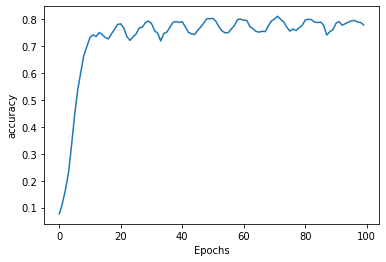

In [13]:
plot_graphs(history, 'accuracy')


In [14]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this dream will go home with tears and cakes there gone for they now for i bride my bould away away cross gone by right gone gone gone away away cross the sea may town today again gone gone away now side by right side by revenge i had gone your cross gone again gone gone and gone is consumed gone away cross the counter then the gone under gone had gone right gone gone eyes someone joined gone away me gone by killarneys side a lovd born from kilkenny gone and right had gone gone away gone gone by gone
